# Non-Stat Contextual Bandit Optimization
Here we will test the library [IS_non_stationary_RL](https://github.com/pierresdr/IS_non_stationary_RL) to evaluate and optimize the Non-Stationary Contextual Bandit.
The in the library is defined the custom environment with a non-stationary context distribution. The environment behaviour is explained at the beginning of [NS_contextual bandits.ipynb](./non-stat_contextual_bandits.ipynb), which contains different tests of similar environments.

In [2]:
# 'autoreload' allows to update modules without resetting the kernel 
%load_ext autoreload
%autoreload 2

In [53]:
# Import 'IS_Non-Stationary RL' library
import sys
sys.path.append('../../IS_non_stationary_RL/')

from policy import Hyperpolicy, Policy
from env.contextual_bandits import ContextualBandit
from importance_sampling.mis_balance_heuristic import MIS_bh_estimation

# Import other libraries
from tqdm import tqdm
import argparse
import numpy as np
import matplotlib.pyplot as plt

 ## Define and test the optimal policy

In [54]:
def play_nu(nu, env, n_steps):

    contexts = np.zeros(n_steps)
    thetas   = np.zeros(n_steps)
    rewards  = np.zeros(n_steps)
    actions  = np.zeros(n_steps)
    non_stat_process = np.zeros(n_steps)
    theta_means      = np.zeros(n_steps)
    
    x_t = env.reset()
    for t in tqdm(range(n_steps)):
        
        policy = nu.sample_policy(t)

        contexts[t] = x_t
        thetas[t] = policy.theta
        
        # Perform a step sampling the action from current policy 
        action = policy.sample_action(x_t)
        x_t, r_t = env.step(action)
        
        rewards[t] = r_t
        actions[t] = action
        non_stat_process[t] = env.non_stat_process(t)
        theta_means[t] = nu.theta_mean(t)

    #return MIS_bh_estimation(nu, thetas, rewards, alpha=n_steps, beta=1)
    return contexts, thetas, rewards, actions, non_stat_process, theta_means

100%|██████████| 10/10 [00:00<00:00, 1416.18it/s]


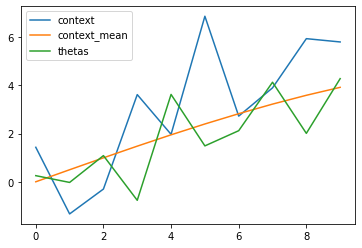

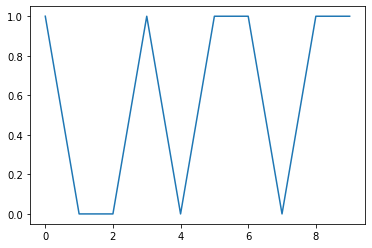

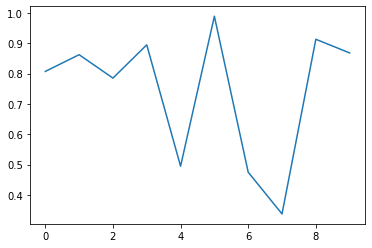

In [55]:
nu = Hyperpolicy(Policy, sigma_theta=1, A=5, psi=0, phi=0.1) 
env = ContextualBandit(mean_reward=True, sigma_x=2, A=5, psi=0, phi=0.1) 

contexts, thetas, rewards, actions, non_stat_process, theta_means = play_nu(nu, env, 10)

plt.plot(contexts, label='context')
plt.plot(non_stat_process, label='context_mean')
plt.plot(thetas, label='thetas')
plt.legend()
plt.show()

plt.plot(actions)
plt.show()

plt.plot(rewards)
plt.show()